In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('MELBOURNE_HOUSE_PRICES_LESS.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
df.shape

(63023, 13)

In [5]:
df['Type'].value_counts()

h    45053
u    11655
t     6315
Name: Type, dtype: int64

In [6]:
df=df[['Rooms','Price','Propertycount','Distance']]

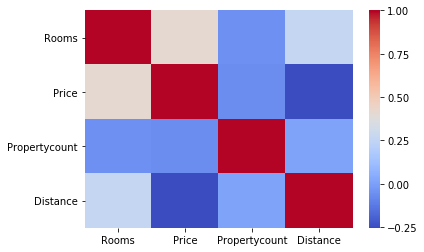

In [7]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [8]:
df=df.dropna()

In [9]:
df.isnull().sum()

Rooms            0
Price            0
Propertycount    0
Distance         0
dtype: int64

In [10]:
df.dtypes

Rooms              int64
Price            float64
Propertycount      int64
Distance         float64
dtype: object

In [11]:
df['Rooms']=df['Rooms'].astype(float)

In [12]:
df.dtypes

Rooms            float64
Price            float64
Propertycount      int64
Distance         float64
dtype: object

In [13]:
X=df.iloc[:,df.columns!='Price']
y=df.iloc[:,df.columns=='Price']
#y=y.values.ravel()

In [14]:
y.shape

(48433, 1)

In [15]:
X.shape

(48433, 3)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [17]:
# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [18]:
# Create linear regression object
lr = LinearRegression()

# Fit model to training data
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
# Predicting test set results
y_pred = lr.predict(X_test)

In [20]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 337953.5954836369
MSE: 240445227652.95364
RMSE: 490352.1465772875


In [21]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.32481963663291924


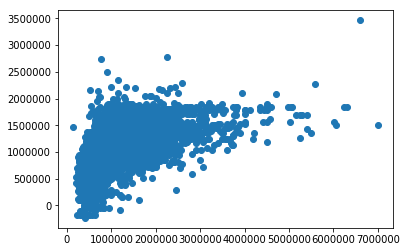

In [22]:
plt.scatter(y_test, y_pred)

c:\program files\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


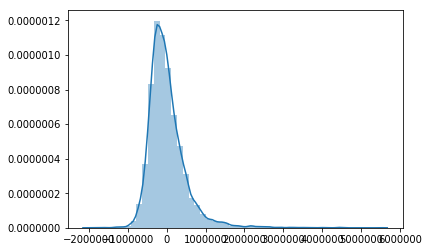

In [23]:
sns.distplot((y_test - y_pred))